## <p style="text-align:center;"> Speed Dating Project: Understanding Match Interest 💘 </p>

Tinder's marketing team is tackling a project aimed at reversing a <b>decrease in the number of matches on the app</b>. Their goal is to understand the factors that drive mutual interest between people.

To gather insights, they conducted <b>a speed dating experiment</b>. Participants provided extensive personal information, which could reflect potential app profile data.


### Dataset Overview
- Source: Data collected from the speed dating experiment.
- Unit of Observation: Each row represents a single speed date between two individuals.
- Key Information: The dataset records whether each person on the date secretly agreed to go on a second date with the other, serving as a proxy for a "match" or mutual interest. 

## 1. Import & parse dataset

In [4]:
# Import librairies

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv(r"C:\Users\justi\OneDrive\Je-deviens-Data-Analyst\JEDHA\00_Certif\bloc_2\tinder_python\src\Speed+Dating+Data.csv",
                 encoding = "latin1",
                 on_bad_lines ='skip')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(8378, 195)

In [7]:
df.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

In [8]:
# Look at the main dataset statistics

df.describe(include="all")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


### Check and parse missing values

In [9]:
# Check volume of missing values

df.isna().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [10]:
# for missing values in age and age_o, filling with median since 75% of subjects are between 24-28 yo
# for missing values in race and race_o, filling with mode
# for missing values in goal, filling with '6' = other
# for missing values in date, go out, imprace, imprelig, filling with median

df.fillna({'age': df['age'].mean(),
                 'age_o': df['age_o'].mean(),
                 'race': df['race'].mean(),
                 'race_o': df['race_o'].mean()}, 
                inplace=True)
df.fillna({'goal': 6}, inplace = True)

df.fillna({'date': df['date'].median(),
                 'go_out': df['go_out'].median(),
                 'imprace': df['imprace'].median(),
                 'imprelig': df['imprelig'].median()}, 
                inplace=True)

### Create columns to label the categorical values

In [11]:
# Gender
df["gender_label"] = df["gender"].apply(lambda x:
                                        "Female" if x == 0
                                        else "Male")

# Race
race_map = {
    1: "Black/African American",
    2: "European/Caucasian-American",
    3: "Latino/Hispanic American",
    4: "Asian/Pacific Islander/Asian-American",
    5: "Native American"}

df["race_label"] = df["race"].map(race_map)

order = list(race_map.values())      # keeps the order of the dict
df["race_label"] = pd.Categorical(
    df["race_label"],
    categories=order,
    ordered=True
)

# Go-out habits
go_out_map = {
    1: "Several times a week",
    2: "Twice a week",
    3: "Once a week",
    4: "Twice a month",
    5: "Once a month",
    6: "Several times a year",
    7: "Almost never"}

df["go_out_label"] = df["go_out"].map(go_out_map)

order = list(go_out_map.values())    # keeps the order of the dict
df["go_out_label"] = pd.Categorical(
    df["go_out_label"],
    categories=order,
    ordered=True
)

# Goal
goal_map= {
    1: "Seemed like a fun night out",
    2: "To meet new people",
    3: "To get a date",
    4: "Looking for a serious relationship",
    5: "To say I did it",
    6: "Others"}

df["goal_label"] = df["goal"].map(goal_map)

order = list(goal_map.values())     # keeps the order of the dict
df["goal_label"] = pd.Categorical(
    df["goal_label"],
    categories=order,
    ordered=True
)

# [dec] = Circle “Yes” or “No” below the ID number of each person you meet to indicate whether or not you would like to see him or her again.  
df["decision_label"] = df["dec"].apply(lambda x:
                                       "Yes" if x == 1
                                      else "No")

# Match
df["match_label"] = df["match"].apply(lambda x:
                                      "Match" if x == 1
                                      else "No-match")


## 2. Get a better understanding of the sample

In [12]:
df["iid"].nunique()

551

We count 551 unique subjects in the experiment.

In [13]:
# Group by subjects (iid) to look at the sample profiling

df_groupby_iid = df.drop_duplicates(subset=['iid'])
df_groupby_iid.shape

(551, 201)

### Sample profiling

In [14]:
# Set palette to avoid confusion between variables in the visualisation.

def get_palette(var):
    base = sns.color_palette("Set2", 8)
    palettes = {
        "gender_label": {"Female": base[0], "Male": base[1]},
        "match_label": {"Match": base[3], "No-match": base[2]},
        "decision_label": {"Yes": base[4], "No": base[5]}
    }
    return palettes.get(var, dict(zip(df[var].unique(), base)))


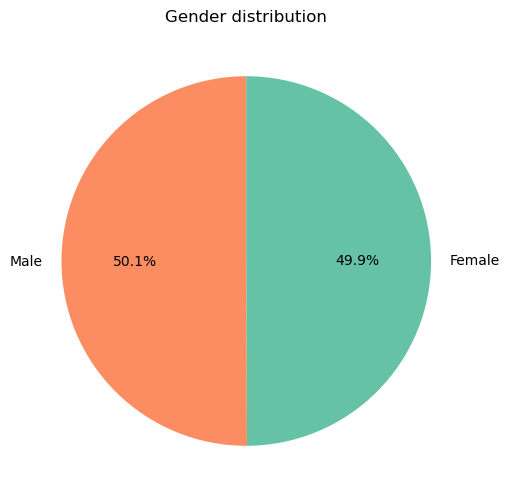

In [15]:
# Gender distribution

# Count values
gender_counts = df['gender_label'].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index,        
    autopct='%1.1f%%',          
    startangle=90,
    colors=[get_palette("gender_label")[label] for label in gender_counts.index]
)
plt.title("Gender distribution")

plt.show()

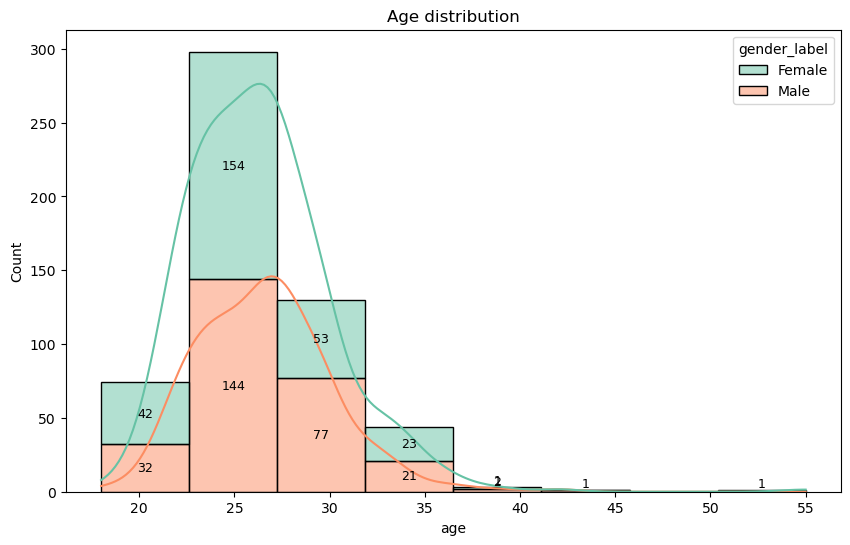

In [16]:
# Age distribution

plt.figure(figsize=(10,6))

ax= sns.histplot(
        data= df_groupby_iid,
        x= df_groupby_iid["age"],
        hue= "gender_label",
        bins= 8,
        multiple= "stack",
        kde= True, 
        palette=get_palette("gender_label")
)

plt.title("Age distribution")

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height == 0:
            continue
        
        if height < 3:
            # ➜ small bars → label above
            ax.annotate(
                f"{int(height)}",
                (bar.get_x() + bar.get_width()/2, bar.get_y() + height),
                ha='center', va='bottom', fontsize=9
            )
        else:
            # ➜ other → label centered
            ax.annotate(
                f"{int(height)}",
                (bar.get_x() + bar.get_width()/2, bar.get_y() + height/2),
                ha='center', va='center', fontsize=9, color="black"
            )

plt.show()

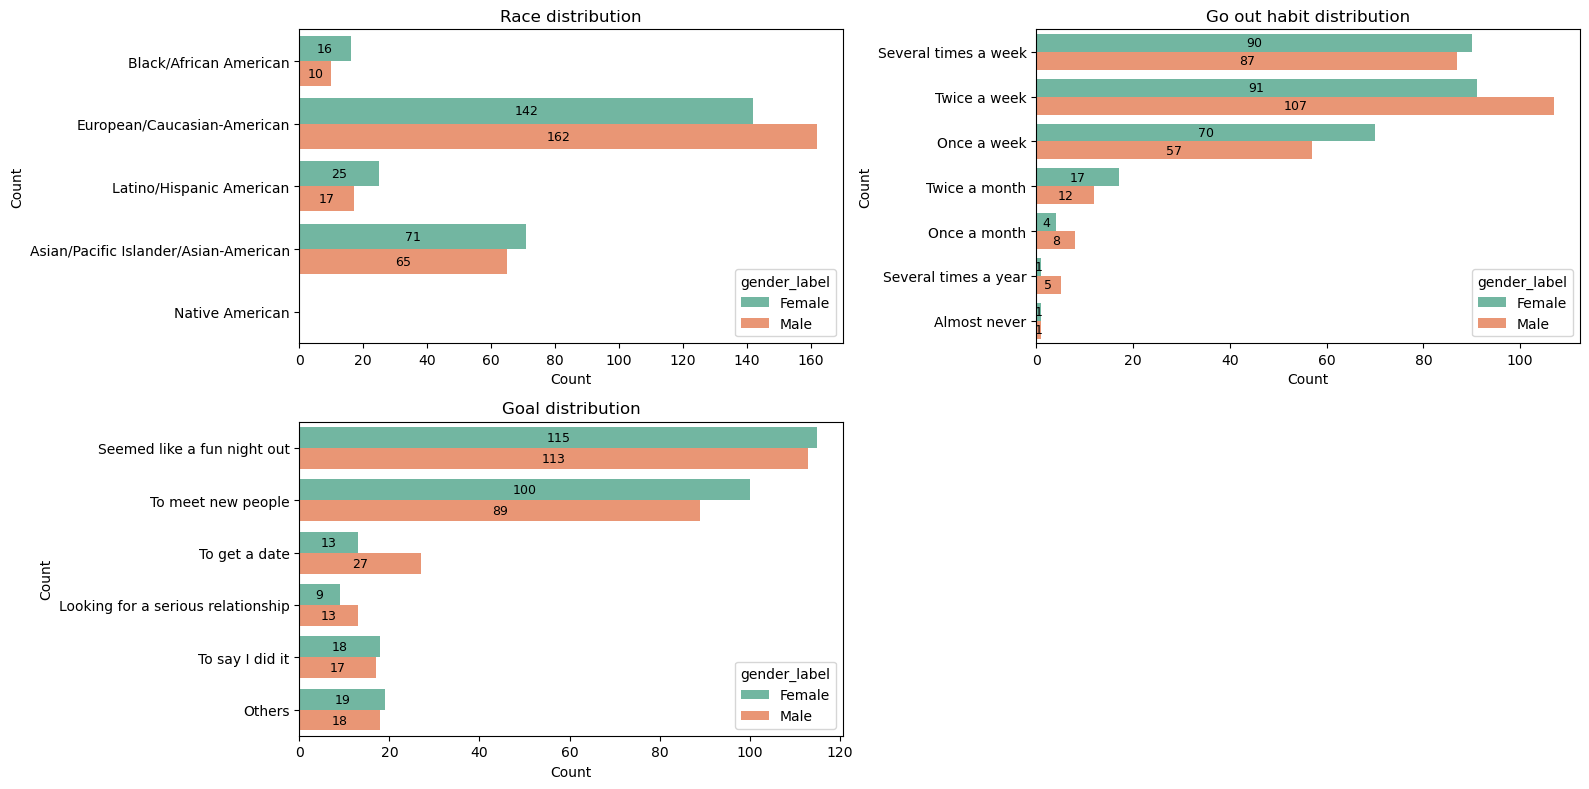

In [17]:
plt.figure(figsize=(16, 8))

# Set plots
plots = [
    {
        "x": "race_label",
        "title": "Race distribution",
        "xlabel": "Count",
    },
    {
        "x": "go_out_label",
        "title": "Go out habit distribution",
        "xlabel": "Count"
    },
    {
          "x": "goal_label",
          "title": "Goal distribution",
          "xlabel": "Count"
    }
]

# Set subplot with a for loop
for i, plot in enumerate(plots, start=1):
    plt.subplot(2, 2, i)
    
    ax = sns.countplot(
        data= df_groupby_iid,
        y= plot["x"],
        hue= "gender_label",
        palette=get_palette("gender_label"),
        orient= "h"
    )

    # Add labels in bins
    for bar in ax.patches:
            width = bar.get_width()
            if width > 0:
                ax.text(
                    width / 2,                     
                    bar.get_y() + bar.get_height()/2,  
                    str(int(width)),
                    ha="center",
                    va="center",
                    fontsize=9,
                    color="black"
                )

    # Layout 
    plt.title(plot["title"])
    plt.xlabel(plot["xlabel"])
    plt.ylabel("Count")
    plt.tight_layout()

plt.show()

The population looks homogeneous in terms of gender across ages, races and go out habits. I guess this is the case across all categorical values.    
I assume the sample has been made based on the statistical distribution of Tinder's audience.

### Decision & Matching distribution

In [18]:
# drop duplicates reg. subjects meeting each other during the experiment iid-pid <=> pid-iid

df['peer_key'] = df.apply(lambda x: tuple(
                                        sorted([x['iid'], x['pid']])), # sorted values to instance them in the same order in the tuple
                                        axis=1)

df_unique = df.drop_duplicates(subset='peer_key')


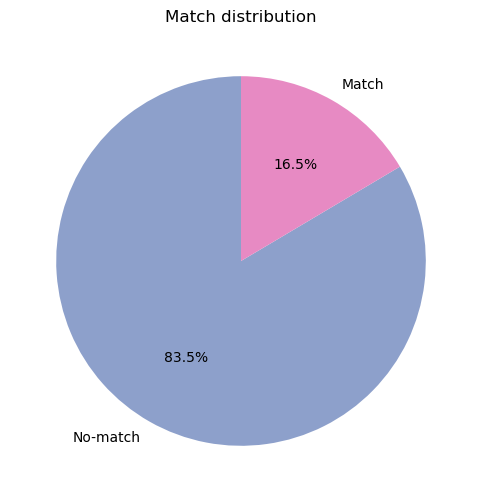

In [19]:
# Match distribution

# Count values
match_counts = df["match_label"].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(match_counts, labels=match_counts.index,        
    autopct='%1.1f%%',          
    startangle=90,
    colors=[get_palette("match_label")[label] for label in match_counts.index]
)

plt.title("Match distribution")
plt.show()

In [20]:
df_unique.shape

(4194, 202)

We have 16.5% of matches, meaning partners who both decided to meet again the other.  

If we count 551 unique subjects in the experiment, they all met several partners, leading to 4,194 dates overall. Let's have a closer look at the decision after each meet, recorded in [dec] column, distribution.  

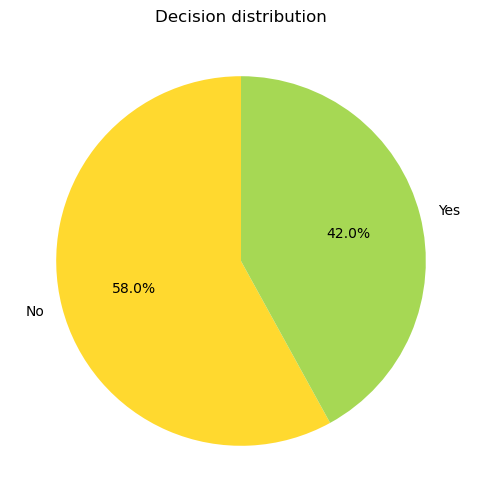

In [21]:
# Decision distribution

# Count values
decision_counts = df["decision_label"].value_counts()   # using the whole dataset here to analyse individual decisions

# Plot
plt.figure(figsize=(6,6))
plt.pie(decision_counts, labels=decision_counts.index,        
    autopct='%1.1f%%',          
    startangle=90,
    colors=[get_palette("decision_label")[label] for label in decision_counts.index]
)

plt.title("Decision distribution")
plt.show()

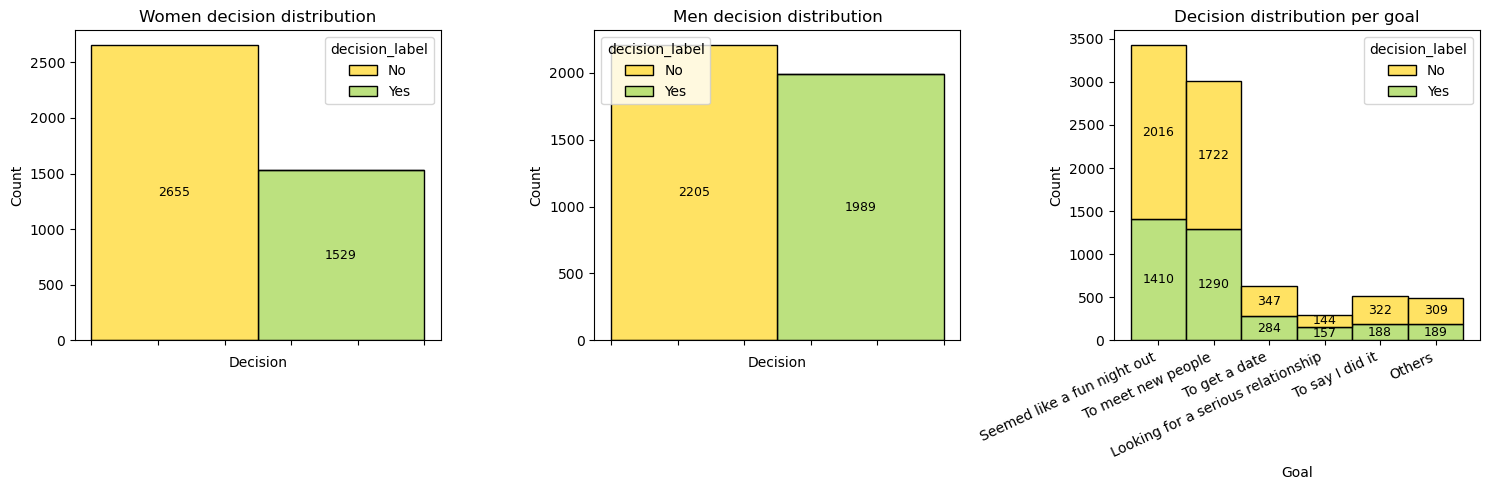

In [22]:
# Decision distribution

# Split dataframe by gender

df_men = df[df["gender"] == 1]      
df_women = df[df["gender"] == 0]

plt.figure(figsize=(15, 5))

# Set plots arguments
plots = [
    (df_women, "dec", "decision_label", 2, "stack", "Women decision distribution"),
    (df_men, "dec", "decision_label", 2, "stack", "Men decision distribution"),
    (df, "goal_label", "decision_label", 6, "stack", "Decision distribution per goal")
]

# Set subplot
for i, (data, x, hue, bins, multiple, title) in enumerate(plots, start=1):
    plt.subplot(1, 3, i)
    ax = sns.histplot(
        data= data,
        x= x,
        hue= hue,
        hue_order= ["No", "Yes"],
        bins= bins,
        multiple= multiple,
        palette= get_palette(hue)
    )

    # Define layout for the plots
    for container in ax.containers:
        labels = [f'{int(bar.get_height())}' if bar.get_height() > 0 else '' for bar in container]
        ax.bar_label(container, labels=labels, label_type='center', fontsize=9)
    
    plt.title(title)
    if x == "goal_label":
        plt.xticks(rotation=25, ha="right")
        plt.xlabel("Goal")
    else:
        ax.set_xticklabels([])
        plt.xlabel("Decision")

plt.tight_layout()
plt.show()


## 3. Why people are keen on meeting again a partner?

This section focuses on identifying which personal attributes most strongly influence the decision to meet again. We compute and compare the mean attribute scores for “Yes” and “No” decisions, and calculate their differences.

In [23]:
# Mean per criterion

cols_criteria = ["attr", "sinc", "intel", "fun", "amb", "shar"]

mean_scores = df.groupby("decision_label")[cols_criteria].mean().round(2)
mean_scores = mean_scores.T

mean_scores.sort_values("Yes", ascending=False)

decision_label,No,Yes
intel,7.08,7.76
sinc,6.86,7.60
fun,5.70,7.33
attr,5.37,7.29
amb,6.49,7.16
shar,4.72,6.46


Here we can see the top criteria in terms of scoring leading to the decision to meet again a partner:  
1.  Intelligence, 
2. Sincerity,
3. Fun
4. Attraction
5. Ambition
6. Shared Interests    

But it's worth comparing the scores between Yes and No to see what criteria make the most difference: 

In [24]:
# creating a column to see the difference per criterion between Yes and No

mean_scores_comp = mean_scores.assign(
    Difference = lambda x: (x.iloc[:,1] - x.iloc[:,0]).round(2))

mean_scores_comp.sort_values("Difference", ascending=False)

decision_label,No,Yes,Difference
attr,5.37,7.29,1.92
shar,4.72,6.46,1.74
fun,5.70,7.33,1.63
sinc,6.86,7.60,0.74
intel,7.08,7.76,0.68
amb,6.49,7.16,0.67


We see that scoring in Attraction, Shared interests and Fun  make the most the difference in the decision making to meet again the partner.  

Adding some visualisation to better see the distribution of the scores across all criteria:

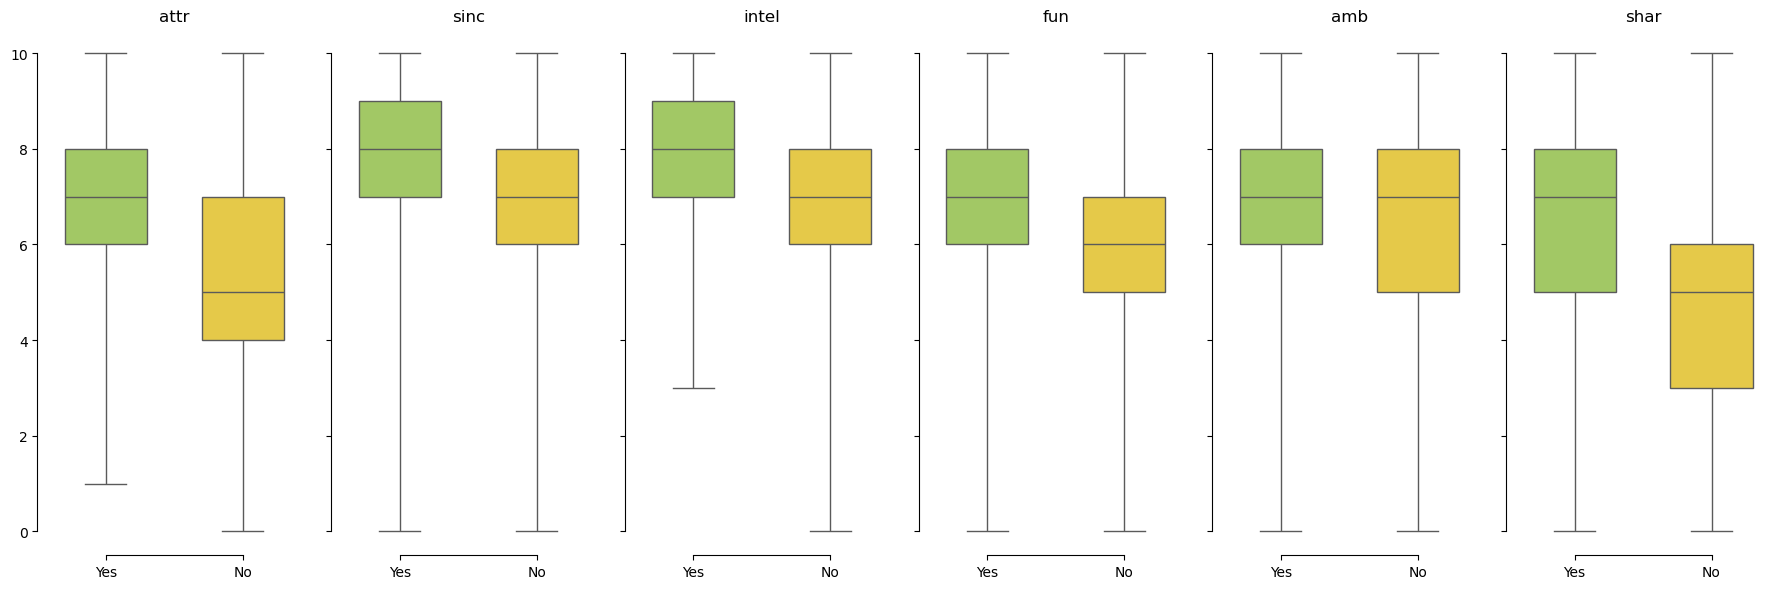

In [25]:
f, axes = plt.subplots(1, 6, figsize=(18,6), sharey=True)
for ax, criteria in zip(axes, cols_criteria):
    sns.boxplot(
        data=df,
        x="decision_label",
        y=criteria,
        hue="decision_label",
        whis=[0, 100],
        width=.6,
        palette= get_palette("decision_label"),
        ax=ax
    )
    ax.set_title(criteria)
    ax.set_xlabel("")
    ax.set_ylabel("")

sns.despine(trim=True)
plt.tight_layout()
plt.show()

### Compare scoring between Men and Women

In [26]:
# Compare Men and Women

# df_women= df[df["gender_label"] == "Female"]

mean_scores_women = df_women.groupby("decision_label")[cols_criteria].mean().round(2)
mean_scores_women = mean_scores_women.T

mean_scores_comp_women = mean_scores_women.assign(
    Difference = lambda x: (x.iloc[:,1] - x.iloc[:,0]).round(2))

mean_scores_comp_women = mean_scores_comp_women.rename( # renaming columns for readibility
    columns={
        "Yes": "W-Avg Score (Yes)",
        "No": "W-Avg Score (No)",
        "Difference": "W-Score Difference"})


# df_men= df[df["gender_label"] == "Male"]

mean_scores_men = df_men.groupby("decision_label")[cols_criteria].mean().round(2)
mean_scores_men = mean_scores_men.T

mean_scores_comp_men = mean_scores_men.assign(
    Difference = lambda x: (x.iloc[:,1] - x.iloc[:,0]).round(2))

mean_scores_comp_men = mean_scores_comp_men.rename( # renaming columns for readibility
    columns={
        "Yes": "M-Avg Score (Yes)",
        "No": "M-Avg Score (No)",
        "Difference": "M-Score Difference"})


print("Women scoring:")
print(mean_scores_comp_women.sort_values("W-Score Difference", ascending=False))
print()
print("Men scoring:")
print(mean_scores_comp_men.sort_values("M-Score Difference", ascending=False))

Women scoring:
decision_label  W-Avg Score (No)  W-Avg Score (Yes)  W-Score Difference
shar                        4.70               6.58                1.88
attr                        5.23               7.07                1.84
fun                         5.61               7.38                1.77
sinc                        6.78               7.63                0.85
intel                       7.16               7.93                0.77
amb                         6.70               7.37                0.67

Men scoring:
decision_label  M-Avg Score (No)  M-Avg Score (Yes)  M-Score Difference
attr                        5.53               7.45                1.92
shar                        4.75               6.37                1.62
fun                         5.80               7.30                1.50
amb                         6.24               7.00                0.76
intel                       6.98               7.62                0.64
sinc                        6.95   

Top 3 scoring attributes for <b>women</b> (meaning women rating men) are:  
1. [intel] Intelligence (7.93)  
2. [sinc]  Sincerity    (7.63)  
3. [amb]   Ambition     (7.37)  

But when we look at the scores with a highest difference between Yes and No, we have another attributes ranking:  
1. Shared Interests (+1.88 ppt)  
2. Attraction (+1.84 ppt)  
3. Fun (+1.77 ppt)  
4. Sincerity (+0.85 ppt)  
5. Intelligence (+ 0.77 ppt) 
6. Ambition (+ 0.67 ppt) 

Top 3 scoring attributes for <b>men</b> (meaning men rating women) are:  
1. [intel] Intelligence (7.62)  
2. [sinc]  Sincerity    (7.57)  
3. [attr]  Attraction   (7.45)  

But when we look at the scores with a highest difference between Yes and No, we have another attributes ranking:  
1. Attraction (+ 1.92 ppt)  
2. Shared Interests (+ 1.62 ppt)  
3. Fun (+1.50 ppt)  
4. Ambition (+ 0.76 ppt) 
5. Sincerity (+0.64 ppt) 
6. Intelligence (+ 0.62 ppt) 

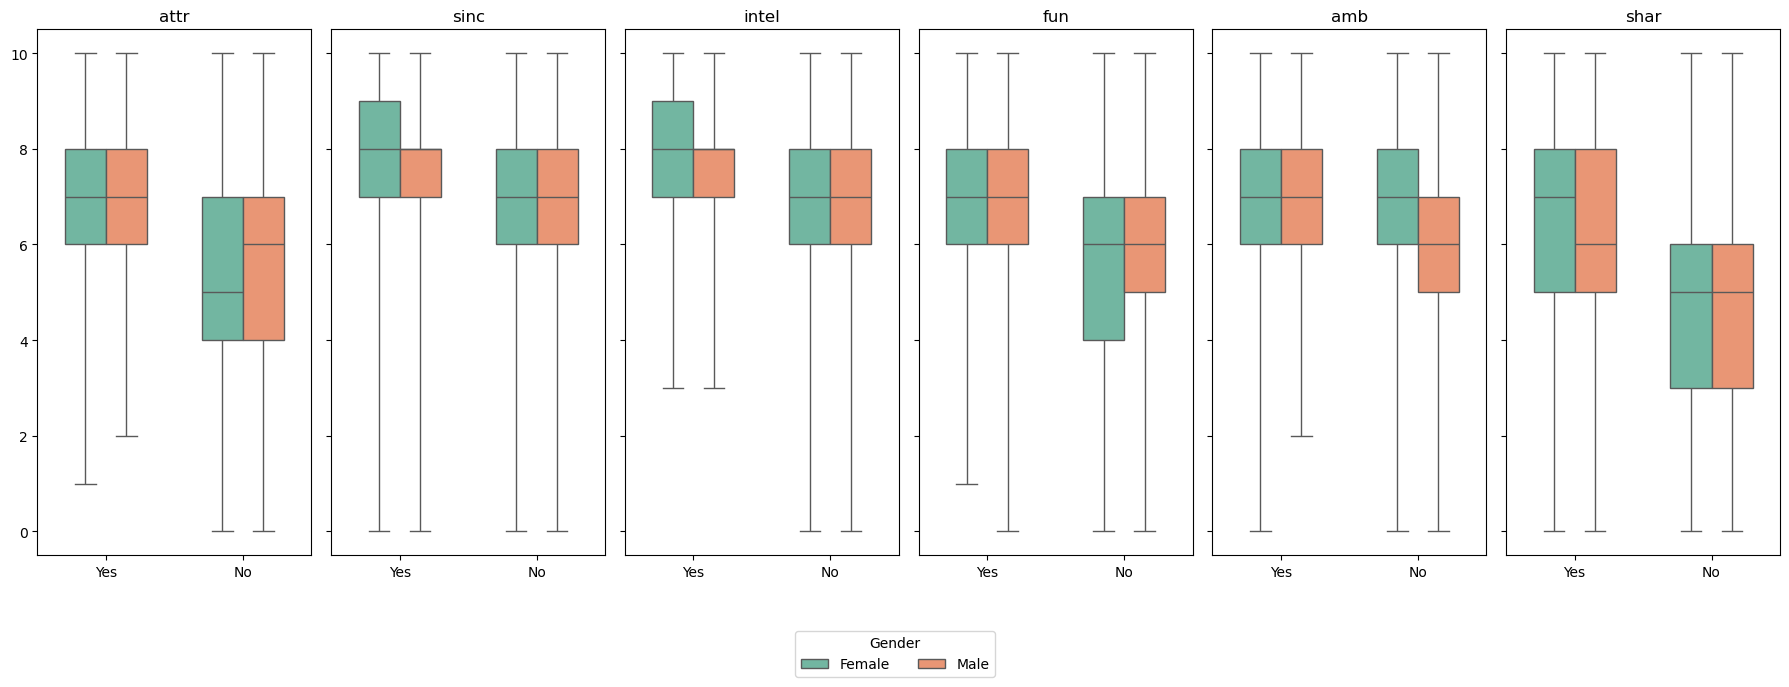

In [27]:
# Compare Men/Women

f, axes = plt.subplots(1, 6, figsize=(18,6), sharey=True)
for ax, criteria in zip(axes, cols_criteria):
    sns.boxplot(
        data=df,
        x="decision_label",
        y=criteria,
        hue="gender_label",
        whis=[0, 100],
        width=.6,
        palette= get_palette("gender_label"),
        ax=ax,
        meanline=True
    )
    ax.set_title(criteria)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
f.legend(handles, labels, title="Gender", loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.tight_layout()
plt.show()

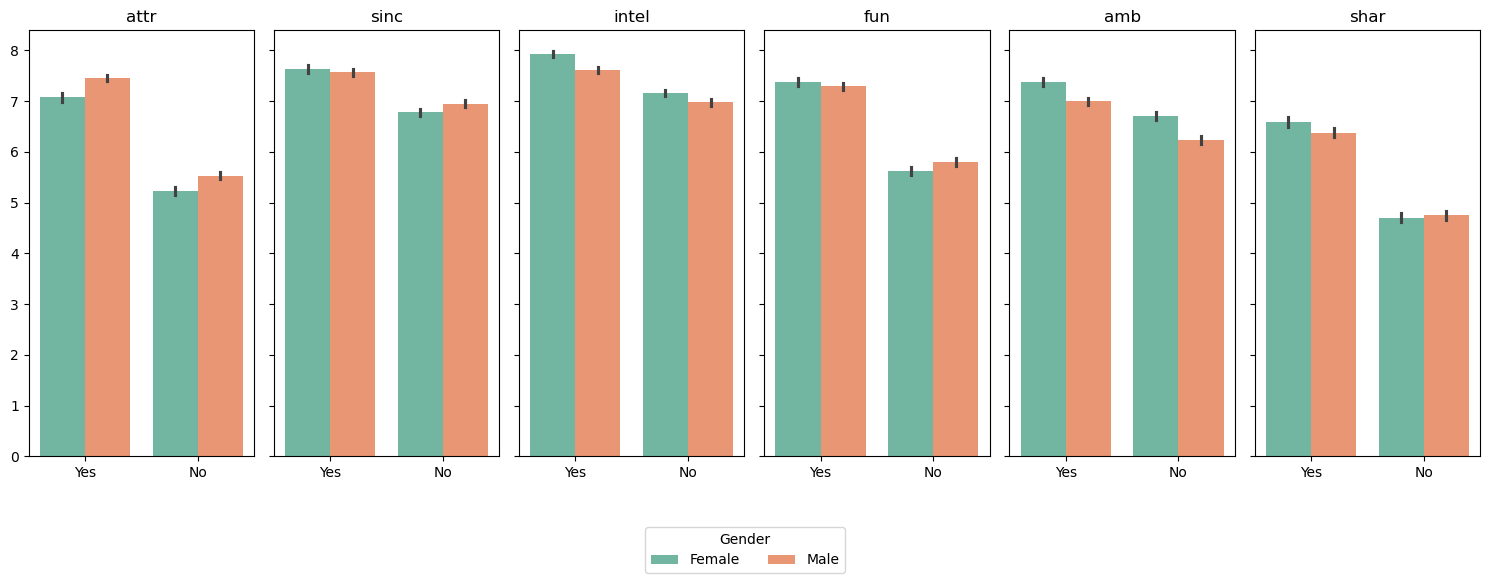

In [28]:
# Compare Men/Women — Barplot version

f, axes = plt.subplots(1, 6, figsize=(15,5), sharey=True)
for ax, criteria in zip(axes, cols_criteria):
    sns.barplot(
        data=df,
        x="decision_label",
        y=criteria,
        hue="gender_label",
        palette=get_palette("gender_label"),
        ax=ax
    )
    
    ax.set_title(criteria)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend_.remove()

# Handle the legend once
handles, labels = axes[0].get_legend_handles_labels()
f.legend(handles, labels, title="Gender", loc="upper center",
         bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.tight_layout()
plt.show()


### Compare scoring depending of the goal

In [29]:
list_of_goals= ["Seemed like a fun night out", "To meet new people", "To get a date",
                "Looking for a serious relationship", "To say I did it", "Others"]

df_ = {}    # dictionnaire pour stocker les DataFrames filtrés
mean_scores_ = {}        # Moyennes par match_label
mean_scores_comp_ = {}   # Moyennes + différence

for goal in list_of_goals:
    df_[goal] = df[df["goal_label"] == goal]

    mean_scores_[goal] = df_[goal].groupby("decision_label")[cols_criteria].mean().round(2)
    mean_scores_[goal] = mean_scores_[goal].T

    mean_scores_comp_[goal] = mean_scores_[goal].assign(
        Difference = lambda x: (x.iloc[:,1] - x.iloc[:,0]).round(2))
    

# Checking the loop works
print("Scoring for attendees having the goal 'to get a date':")
print(mean_scores_comp_["To get a date"].sort_values("Difference", ascending=False))

Scoring for attendees having the goal 'to get a date':
decision_label    No   Yes  Difference
attr            5.61  7.45        1.84
shar            5.17  6.77        1.60
fun             6.03  7.40        1.37
amb             6.64  7.39        0.75
sinc            7.07  7.74        0.67
intel           7.26  7.87        0.61


**Comparison of Scoring Differences by User Goal**  

We loop through each “goal_label” segment and display the ranked criteria based on their mean difference between “Yes” and “No”. This allows us to understand whether motivations affect decision criteria.

In [30]:
# Printing all tables for comparison

for goal in list_of_goals:
    print(f"Scoring for attendees having the goal '{goal}':")
    display(mean_scores_comp_[goal].sort_values("Difference", ascending=False))
    print()

Scoring for attendees having the goal 'Seemed like a fun night out':


decision_label,No,Yes,Difference
attr,5.25,7.22,1.97
shar,4.64,6.50,1.86
fun,5.63,7.35,1.72
sinc,6.83,7.58,0.75
intel,6.98,7.73,0.75
amb,6.46,7.13,0.67



Scoring for attendees having the goal 'To meet new people':


decision_label,No,Yes,Difference
attr,5.39,7.26,1.87
shar,4.74,6.42,1.68
fun,5.66,7.33,1.67
sinc,6.76,7.49,0.73
amb,6.41,7.11,0.70
intel,7.02,7.70,0.68



Scoring for attendees having the goal 'To get a date':


decision_label,No,Yes,Difference
attr,5.61,7.45,1.84
shar,5.17,6.77,1.60
fun,6.03,7.40,1.37
amb,6.64,7.39,0.75
sinc,7.07,7.74,0.67
intel,7.26,7.87,0.61



Scoring for attendees having the goal 'Looking for a serious relationship':


decision_label,No,Yes,Difference
attr,5.82,7.52,1.70
shar,4.97,6.20,1.23
fun,6.07,7.14,1.07
sinc,7.35,7.75,0.40
amb,7.03,7.20,0.17
intel,7.77,7.90,0.13



Scoring for attendees having the goal 'To say I did it':


decision_label,No,Yes,Difference
attr,5.18,7.26,2.08
shar,4.52,6.27,1.75
fun,5.53,7.21,1.68
sinc,6.89,7.83,0.94
amb,6.34,7.20,0.86
intel,7.18,7.90,0.72



Scoring for attendees having the goal 'Others':


decision_label,No,Yes,Difference
attr,5.70,7.51,1.81
shar,4.77,6.40,1.63
fun,6.00,7.43,1.43
sinc,7.09,7.84,0.75
intel,7.34,7.94,0.60
amb,6.90,7.34,0.44


**Global ranking of criteria across all goals**  

The following table aggregates all goal segments and ranks criteria by the strength of their influence on the decision to meet again. It provides a consolidated view of the most discriminating attributes.

In [31]:
# Concatening all results in one dataframe for visualisation purpose

mean_scores_all = pd.concat(
    [df.assign(goal_label=goal)
        for goal, df in mean_scores_comp_.items()],
    axis=0)

mean_scores_all.reset_index(inplace=True)
mean_scores_all.rename(columns={"index": "criteria"}, inplace=True)

mean_scores_all["Difference"] = (mean_scores_all["Yes"] - mean_scores_all["No"]).round(2)

mean_scores_all = mean_scores_all[["goal_label", "criteria", "Yes", "No", "Difference"]]

mean_scores_all.sort_values(["goal_label", "Difference"], ascending=[True, False], inplace=True)
mean_scores_all.reset_index(drop=True, inplace=True)
display(mean_scores_all)

decision_label,goal_label,criteria,Yes,No,Difference
0,Looking for a serious relationship,attr,7.52,5.82,1.70
1,Looking for a serious relationship,shar,6.20,4.97,1.23
2,Looking for a serious relationship,fun,7.14,6.07,1.07
3,Looking for a serious relationship,sinc,7.75,7.35,0.40
4,Looking for a serious relationship,amb,7.20,7.03,0.17
5,Looking for a serious relationship,intel,7.90,7.77,0.13
6,Others,attr,7.51,5.70,1.81
7,Others,shar,6.40,4.77,1.63
8,Others,fun,7.43,6.00,1.43
9,Others,sinc,7.84,7.09,0.75


Let's finally visualize these difference scores in a **heatmap** to better see what makes the difference to match during a speed-dating:

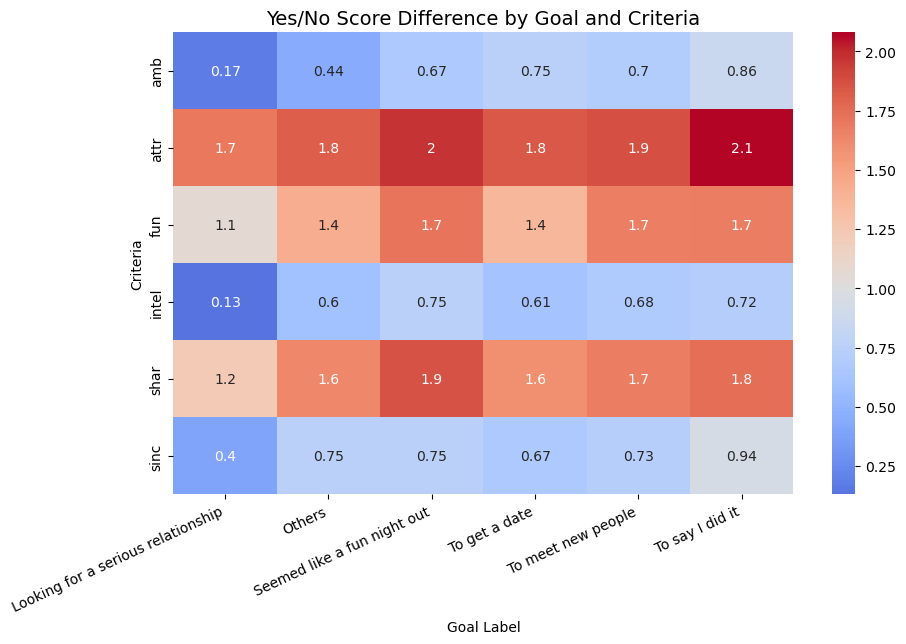

In [32]:
# Get the median of all the "Difference" scores
median_diff= mean_scores_all["Difference"].median()

# Pivot the data so each row = criteria, each column = goal_label
heatmap_data = mean_scores_all.pivot_table(
    index="criteria",
    columns="goal_label",
    values="Difference")

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,         # show the values
    cmap="coolwarm",    
    center=median_diff) # so red/blue are centered around the median of all "Difference" scores 

plt.title("Yes/No Score Difference by Goal and Criteria", fontsize=14)
plt.xlabel("Goal Label")
plt.ylabel("Criteria")
plt.xticks(rotation=25, ha="right")
plt.show()

## Methodology Recap

To identify the attributes that most influence the decision to meet a partner again, we applied the following analytical steps:

1. **Data preparation and filtering**

Selection of relevant variables describing perceived attributes:   
attractiveness (attr), sincerity (sinc), intelligence (intel), fun (fun), ambition (amb), shared interests (shar)

Recoding of decision and goal variables for interpretability (decision_label, goal_label).

2. **Group comparison: “Yes” vs. “No” decisions**

Computation of the mean score for each attribute separately for participants who wanted to meet again (“Yes”) and those who did not (“No”).

Calculation of an additional metric:  
Difference = Mean(Yes) − Mean(No)  
This allows us to quantify which attributes contribute most to a positive decision.  

3. **Segmentation by participant goal**

Replication of the analysis across all goal_label categories.  

Comparison of ranking patterns to determine whether motivations (e.g., serious relationship vs. curiosity) influence the weight of each attribute.  

4. **Synthesis in a global ranking**

Consolidation of all results in a single table sorted by goal and by difference score.  

Identification of the most discriminating attributes across the entire dataset.  

This methodology allows us to isolate the key factors that drive mutual interest within a very short interaction, while also exploring how personal goals shape decision-making.  

## Conclusion

The analysis shows that three attributes have the strongest impact on the decision to see a partner again: **attractiveness**, **shared interests**, and **fun**. These consistently display the largest score differences between “Yes” and “No”, indicating that they are the key drivers of compatibility in a short interaction.

In contrast, **sincerity**, **ambition**, and **intelligence** show only minor differences between decisions. These traits appear valued but not decisive when participants decide whether to reconnect.

The **participant’s goal (goal_label)** also influences how strongly these attributes matter. Those seeking a *serious relationship* show more moderate differences overall. Meanwhile, more exploratory or casual goals—such as *“to meet new people”*, *“to say I did it”*, or *“seemed like a fun night out”*—amplify the importance of attractiveness, shared interests, and fun.

From a marketing perspective, these insights can guide product and communication strategy. Features that highlight shared interests or enhance perceived fun and self-presentation may be particularly effective, and campaigns can be tailored to emphasize the attributes that matter most for each user segment.
